     ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
     ---------------------------------------- 47.1/47.1 kB 2.3 MB/s eta 0:00:00


In [15]:
# %load C:\Users\pandh\Desktop\Assignments\Visual Analytics\Assignment_2\template\A2_decisionTree\scripts\E2_T1_treeAnalysis.py

"""Code for exercise 2, task 1."""

import numpy as np
import pandas as pd

# graphviz for tree drawing
import graphviz

# scikit-learn for decision tree classification and evaluation
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# load the data and make a copy with numerical entries only
df = pd.read_csv('../data/adult.csv', na_values='?').dropna()
df.drop(['fnlwgt'], axis=1, inplace=True)

datasetnum = df.copy()
datasetnum.drop(['education'], axis=1, inplace=True)

for i in list(datasetnum):
    if not (datasetnum[i].dtype == np.float64 or datasetnum[i].dtype == np.int64):
        datasetnum[i] = datasetnum[i].astype('category')
        datasetnum[i] = datasetnum[i].cat.codes
        

def num_features(clf, df):
    """Compute the number of distinct features used by the decision tree.
    
    Args:
        clf: A scikit-learn DecisionTreeClassifier
        
    Returns:
        int: The number of unique features used by the decision tree.    
    """
    
    # get all features used in the tree
    treefeatures = list(filter(lambda a: a != -2, clf.tree_.feature))
    
    # find unique features and their names
    uniquef = set([df.columns[a] for a in treefeatures])
    print(sorted(uniquef))
    
    return len(uniquef)
    

# Train a classifier with a all given data and compute accuracy
X = datasetnum.iloc[:,0:-1]
Y = datasetnum.iloc[:,-1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)
acc = accuracy_score(clf.predict(X),Y)
tree_size = clf.tree_.node_count
num_features_used= num_features(clf, X)

print('Accuracy on training data:', acc) # TODO
print('Size of tree:', tree_size, 'nodes') # TODO
print('Number of features:', num_features_used) # TODO


# print the classification report
target_names = df.income.astype('category').cat.categories
print('Classification report:')
print(classification_report(clf.predict(X),Y, target_names=target_names))


# Create a decision tree classifier with a subset of the data 
# and do cross-validation to determine accuracy 
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X, Y, cv=10)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

# Train a classifier limited to 20 leaf nodes
clf_pruned = tree.DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)
clf_pruned.fit(X, Y)

# Accuracy on the training data for the pruned tree
acc_pruned = accuracy_score(clf_pruned.predict(X), Y)
print('Accuracy on training data (pruned to 20 leaf nodes):', acc_pruned)

# Cross-validation accuracy for the pruned tree
scores_pruned = cross_val_score(clf_pruned, X, Y, cv=10)
print('Cross-validation accuracy (pruned tree): %0.2f (+/- %0.2f)' % (scores_pruned.mean(), scores_pruned.std() * 2))


['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'sex', 'workclass']
Accuracy on training data: 0.9750348120151183
Size of tree: 11137 nodes
Number of features: 12
Classification report:
              precision    recall  f1-score   support

       <=50K       0.99      0.97      0.98     23157
        >50K       0.92      0.98      0.95      7005

    accuracy                           0.98     30162
   macro avg       0.96      0.98      0.97     30162
weighted avg       0.98      0.98      0.98     30162

Accuracy: 0.81 (+/- 0.01)
Accuracy on training data (pruned to 20 leaf nodes): 0.8491147801869903
Cross-validation accuracy (pruned tree): 0.85 (+/- 0.01)


## max_depth

['relationship']
['capital-gain', 'education-num', 'relationship']
['age', 'capital-gain', 'education-num', 'relationship']
['age', 'capital-gain', 'capital-loss', 'education-num', 'relationship']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'occupation', 'relationship', 'workclass']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'marital-status', 'occupation', 'relationship', 'workclass']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'workclass']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'workclass']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'sex', 'workclass']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hou

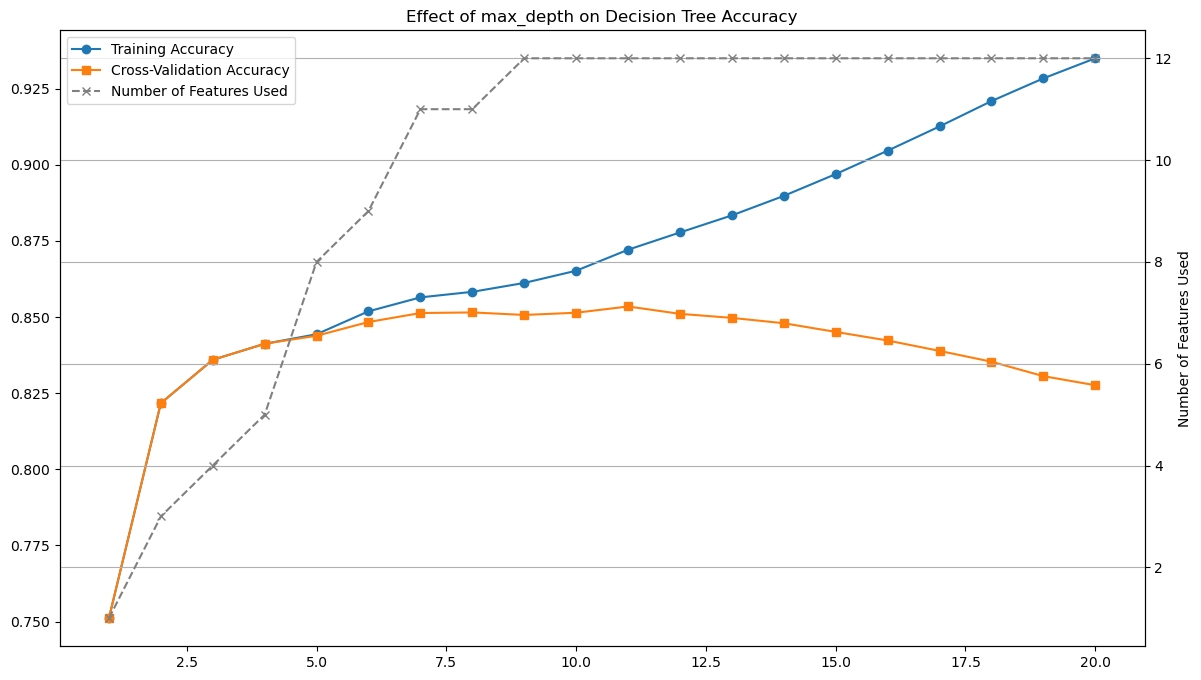

Sweet spot for max_depth: 11 with cross-validation accuracy: 0.85


In [9]:
# --- Code for Analyzing max_depth Parameter ---

# Analyze the effect of max_depth on accuracy
max_depth_range = range(1, 21)  # Change this range as needed
training_accuracies = []
cv_accuracies = []
num_features_used_list = []

for max_depth in max_depth_range:
    # Train a decision tree with the current max_depth setting
    clf_depth = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf_depth.fit(X, Y)
    
    # Calculate training accuracy
    train_accuracy = accuracy_score(Y, clf_depth.predict(X))
    training_accuracies.append(train_accuracy)
    
    # Perform cross-validation and calculate mean accuracy
    cv_scores = cross_val_score(clf_depth, X, Y, cv=10)
    cv_accuracies.append(cv_scores.mean())
    
    # Calculate the number of unique features used
    num_features_used_depth = num_features(clf_depth, X)
    num_features_used_list.append(num_features_used_depth)

# Plot max_depth vs. accuracy
plt.figure(figsize=(14, 8))
plt.plot(max_depth_range, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depth_range, cv_accuracies, label='Cross-Validation Accuracy', marker='s')

# Optionally, add the number of features used as a secondary y-axis
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(max_depth_range, num_features_used_list, label='Number of Features Used', color='gray', linestyle='--', marker='x')
ax2.set_ylabel('Number of Features Used')

# Labels and legend
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Decision Tree Accuracy')
ax2.set_ylabel('Number of Features Used')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')
plt.grid(True)
plt.savefig('../E2-figures/max_depth.png')
plt.show()

# Identifying the sweet spot for max_depth
best_index = np.argmax(cv_accuracies)
best_max_depth = max_depth_range[best_index]
best_cv_accuracy = cv_accuracies[best_index]

print(f'Sweet spot for max_depth: {best_max_depth} with cross-validation accuracy: {best_cv_accuracy:.2f}')





## max_leaf_nodes

['relationship']
['capital-gain', 'education-num', 'relationship']
['age', 'capital-gain', 'capital-loss', 'education-num', 'relationship']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'relationship']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'relationship', 'workclass']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'occupation', 'relationship', 'workclass']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'occupation', 'relationship', 'workclass']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'occupation', 'relationship', 'workclass']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'occupation', 'relationship', 'workclass']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'occupation', 'relationship', 'workclass']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'occupat

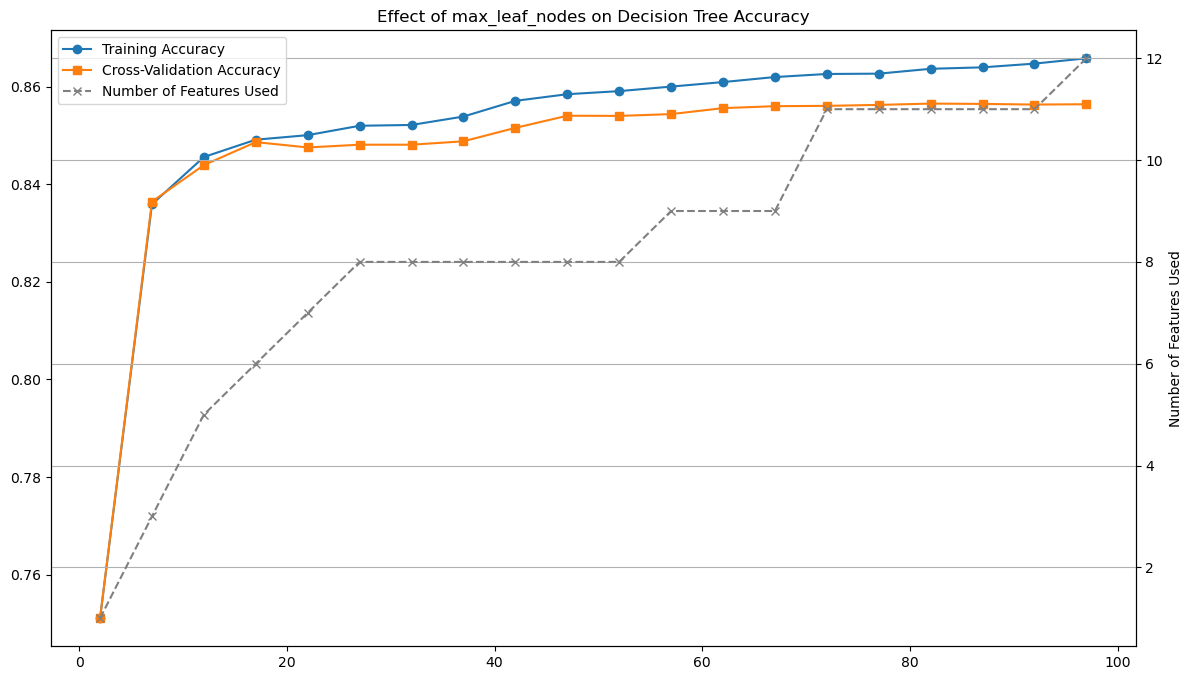

Sweet spot for max_leaf_nodes: 82 with cross-validation accuracy: 0.86


In [10]:
# --- Code for Analyzing max_leaf_nodes Parameter ---

# Analyze the effect of max_leaf_nodes on accuracy
max_leaf_nodes_range = range(2, 101, 5)  # Change this range as needed
training_accuracies_leaf_nodes = []
cv_accuracies_leaf_nodes = []
num_features_used_list_leaf_nodes = []

for max_leaf_nodes in max_leaf_nodes_range:
    # Train a decision tree with the current max_leaf_nodes setting
    clf_leaf_nodes = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
    clf_leaf_nodes.fit(X, Y)
    
    # Calculate training accuracy
    train_accuracy = accuracy_score(Y, clf_leaf_nodes.predict(X))
    training_accuracies_leaf_nodes.append(train_accuracy)
    
    # Perform cross-validation and calculate mean accuracy
    cv_scores = cross_val_score(clf_leaf_nodes, X, Y, cv=10)
    cv_accuracies_leaf_nodes.append(cv_scores.mean())
    
    # Calculate the number of unique features used
    num_features_used_leaf_nodes = num_features(clf_leaf_nodes, X)
    num_features_used_list_leaf_nodes.append(num_features_used_leaf_nodes)

# Plot max_leaf_nodes vs. accuracy
plt.figure(figsize=(14, 8))
plt.plot(max_leaf_nodes_range, training_accuracies_leaf_nodes, label='Training Accuracy', marker='o')
plt.plot(max_leaf_nodes_range, cv_accuracies_leaf_nodes, label='Cross-Validation Accuracy', marker='s')

# Optionally, add the number of features used as a secondary y-axis
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(max_leaf_nodes_range, num_features_used_list_leaf_nodes, label='Number of Features Used', color='gray', linestyle='--', marker='x')
ax2.set_ylabel('Number of Features Used')

# Labels and legend
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')
plt.title('Effect of max_leaf_nodes on Decision Tree Accuracy')
ax2.set_ylabel('Number of Features Used')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')
plt.grid(True)
plt.savefig('../E2-figures/max_leaf_nodes.png')
plt.show()

# Identifying the sweet spot for max_leaf_nodes
best_index_leaf_nodes = np.argmax(cv_accuracies_leaf_nodes)
best_max_leaf_nodes = max_leaf_nodes_range[best_index_leaf_nodes]
best_cv_accuracy_leaf_nodes = cv_accuracies_leaf_nodes[best_index_leaf_nodes]

print(f'Sweet spot for max_leaf_nodes: {best_max_leaf_nodes} with cross-validation accuracy: {best_cv_accuracy_leaf_nodes:.2f}')


## min_samples_leaf

['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'sex', 'workclass']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'sex', 'workclass']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'sex', 'workclass']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'sex', 'workclass']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'sex', 'workclass']
['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'sex', 'work

['age', 'capital-gain', 'capital-loss', 'education-num', 'hour-per-week', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'sex', 'workclass']


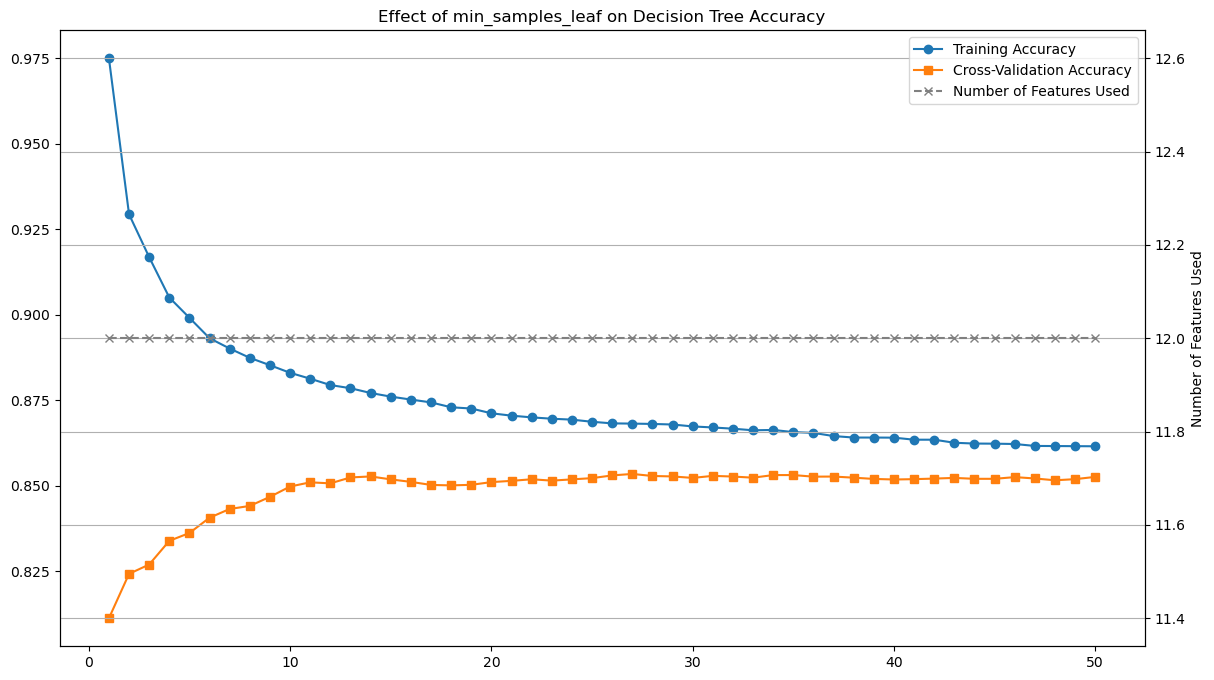

Sweet spot for min_samples_leaf: 27 with cross-validation accuracy: 0.85


In [12]:
# --- Code for Analyzing min_samples_leaf Parameter ---

# Analyze the effect of min_samples_leaf on accuracy
min_samples_leaf_range = range(1, 51)  # Change this range as needed
training_accuracies_min_samples = []
cv_accuracies_min_samples = []
num_features_used_list_min_samples = []

for min_samples_leaf in min_samples_leaf_range:
    # Train a decision tree with the current min_samples_leaf setting
    clf_min_samples = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    clf_min_samples.fit(X, Y)
    
    # Calculate training accuracy
    train_accuracy = accuracy_score(Y, clf_min_samples.predict(X))
    training_accuracies_min_samples.append(train_accuracy)
    
    # Perform cross-validation and calculate mean accuracy
    cv_scores = cross_val_score(clf_min_samples, X, Y, cv=10)
    cv_accuracies_min_samples.append(cv_scores.mean())
    
    # Calculate the number of unique features used
    num_features_used_min_samples = num_features(clf_min_samples, X)
    num_features_used_list_min_samples.append(num_features_used_min_samples)

# Plot min_samples_leaf vs. accuracy
plt.figure(figsize=(14, 8))
plt.plot(min_samples_leaf_range, training_accuracies_min_samples, label='Training Accuracy', marker='o')
plt.plot(min_samples_leaf_range, cv_accuracies_min_samples, label='Cross-Validation Accuracy', marker='s')

# Optionally, add the number of features used as a secondary y-axis
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(min_samples_leaf_range, num_features_used_list_min_samples, label='Number of Features Used', color='gray', linestyle='--', marker='x')
ax2.set_ylabel('Number of Features Used')

# Labels and legend
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Effect of min_samples_leaf on Decision Tree Accuracy')
ax2.set_ylabel('Number of Features Used')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')
plt.grid(True)
plt.savefig('../E2-figures/min_samples_leaf.png')
plt.show()

# Identifying the sweet spot for min_samples_leaf
best_index_min_samples = np.argmax(cv_accuracies_min_samples)
best_min_samples_leaf = min_samples_leaf_range[best_index_min_samples]
best_cv_accuracy_min_samples = cv_accuracies_min_samples[best_index_min_samples]

print(f'Sweet spot for min_samples_leaf: {best_min_samples_leaf} with cross-validation accuracy: {best_cv_accuracy_min_samples:.2f}')


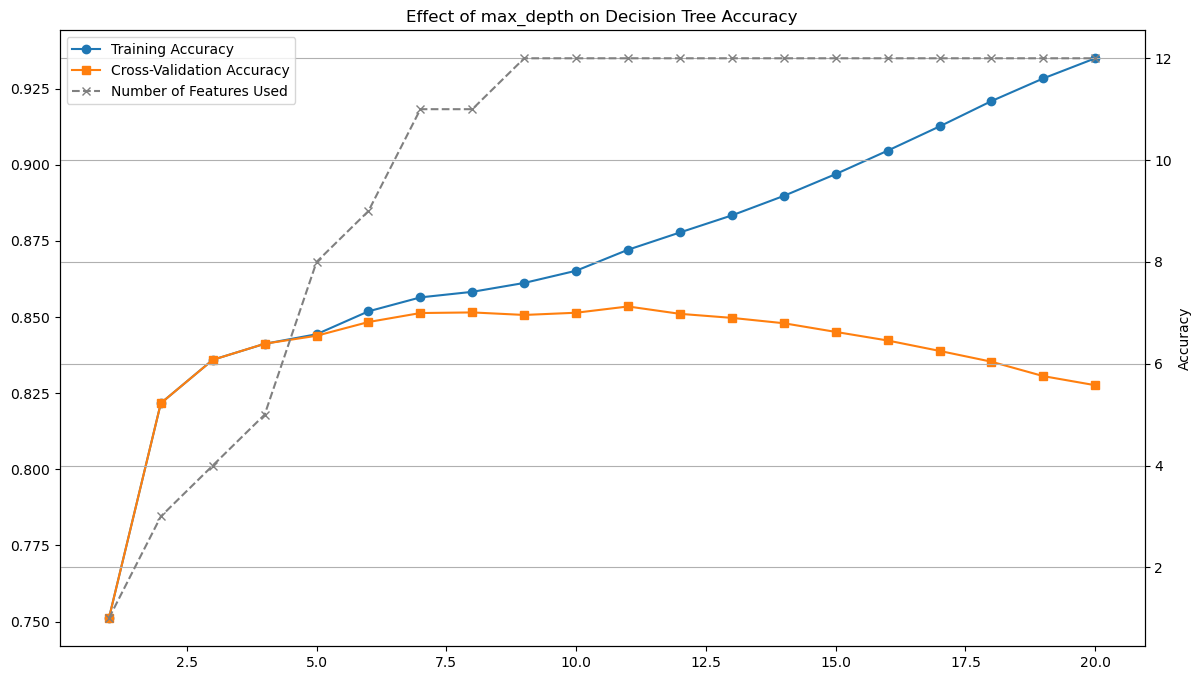

Sweet spot for max_depth: 11 with cross-validation accuracy: 0.85


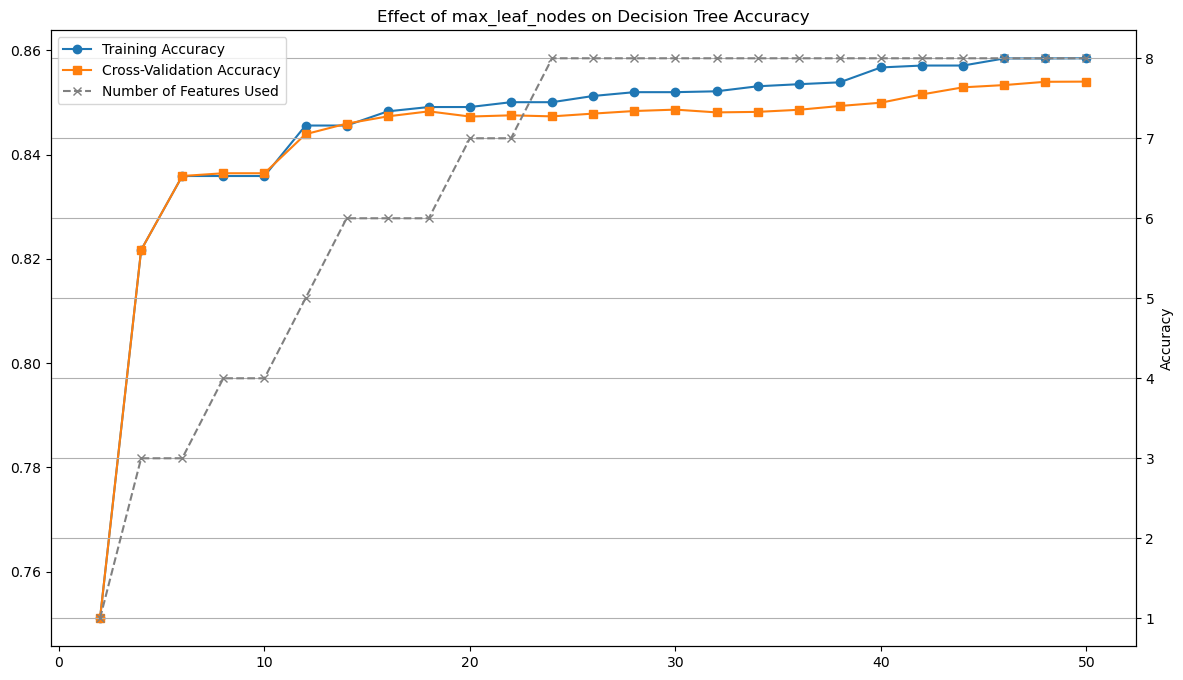

Sweet spot for max_leaf_nodes: 50 with cross-validation accuracy: 0.85


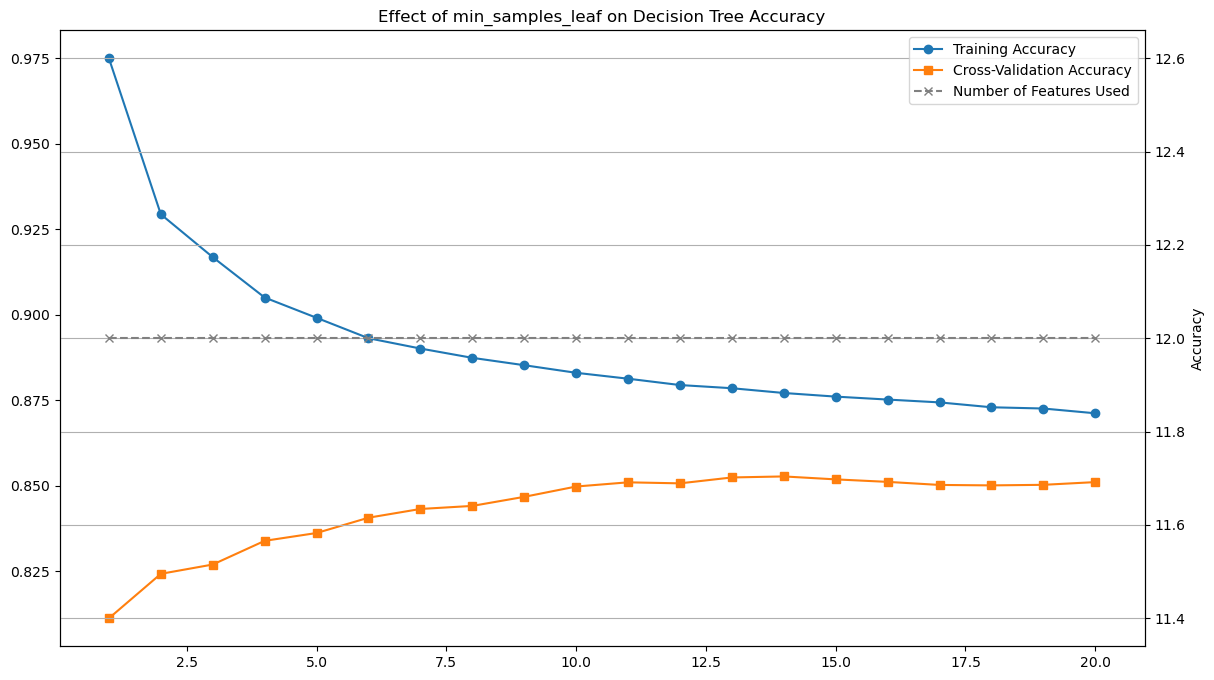

Sweet spot for min_samples_leaf: 14 with cross-validation accuracy: 0.85


In [14]:
"""Code for exercise 2, task 2."""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Load the data and make a copy with numerical entries only
df = pd.read_csv('../data/adult.csv', na_values='?').dropna()
df.drop(['fnlwgt'], axis=1, inplace=True)

datasetnum = df.copy()
datasetnum.drop(['education'], axis=1, inplace=True)

# Convert categorical variables to codes
for i in list(datasetnum):
    if not (datasetnum[i].dtype == np.float64 or datasetnum[i].dtype == np.int64):
        datasetnum[i] = datasetnum[i].astype('category')
        datasetnum[i] = datasetnum[i].cat.codes

# Define function to compute number of distinct features used by the decision tree
def count_features(clf, df):
    """Compute the number of distinct features used by the decision tree.
    
    Args:
        clf: A scikit-learn DecisionTreeClassifier
        
    Returns:
        int: The number of unique features used by the decision tree.    
    """
    # Get all features used in the tree
    tree_features = list(filter(lambda a: a != -2, clf.tree_.feature))
    
    # Find unique features
    unique_features = set([df.columns[a] for a in tree_features])
    
    return len(unique_features)

# Prepare the data
X = datasetnum.iloc[:, 0:-1]
Y = datasetnum.iloc[:, -1]

# Analyze max_depth parameter
max_depth_range = range(1, 21)
training_accuracies_depth = []
cv_accuracies_depth = []
features_used_depth = []

for max_depth in max_depth_range:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X, Y)
    
    train_accuracy = accuracy_score(Y, clf.predict(X))
    training_accuracies_depth.append(train_accuracy)
    
    cv_scores = cross_val_score(clf, X, Y, cv=10)
    cv_accuracies_depth.append(cv_scores.mean())
    
    feature_count = count_features(clf, X)
    features_used_depth.append(feature_count)

# Plotting max_depth
plt.figure(figsize=(14, 8))
plt.plot(max_depth_range, training_accuracies_depth, label='Training Accuracy', marker='o')
plt.plot(max_depth_range, cv_accuracies_depth, label='Cross-Validation Accuracy', marker='s')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(max_depth_range, features_used_depth, label='Number of Features Used', color='gray', linestyle='--', marker='x')
ax2.set_ylabel('Number of Features Used')

plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Decision Tree Accuracy')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')
plt.grid(True)
plt.savefig('../E2-figures/max_depth.png')
plt.show()

best_index = np.argmax(cv_accuracies_depth)
best_max_depth = max_depth_range[best_index]
best_cv_accuracy_depth = cv_accuracies_depth[best_index]

print(f'Sweet spot for max_depth: {best_max_depth} with cross-validation accuracy: {best_cv_accuracy_depth:.2f}')

# Analyze max_leaf_nodes parameter
max_leaf_nodes_range = range(2, 51, 2)
training_accuracies_leaf = []
cv_accuracies_leaf = []
features_used_leaf = []

for max_leaf_nodes in max_leaf_nodes_range:
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
    clf.fit(X, Y)
    
    train_accuracy = accuracy_score(Y, clf.predict(X))
    training_accuracies_leaf.append(train_accuracy)
    
    cv_scores = cross_val_score(clf, X, Y, cv=10)
    cv_accuracies_leaf.append(cv_scores.mean())
    
    feature_count = count_features(clf, X)
    features_used_leaf.append(feature_count)

# Plotting max_leaf_nodes
plt.figure(figsize=(14, 8))
plt.plot(max_leaf_nodes_range, training_accuracies_leaf, label='Training Accuracy', marker='o')
plt.plot(max_leaf_nodes_range, cv_accuracies_leaf, label='Cross-Validation Accuracy', marker='s')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(max_leaf_nodes_range, features_used_leaf, label='Number of Features Used', color='gray', linestyle='--', marker='x')
ax2.set_ylabel('Number of Features Used')

plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')
plt.title('Effect of max_leaf_nodes on Decision Tree Accuracy')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')
plt.grid(True)
plt.savefig('../E2-figures/max_leaf_nodes.png')
plt.show()

best_index = np.argmax(cv_accuracies_leaf)
best_max_leaf_nodes = max_leaf_nodes_range[best_index]
best_cv_accuracy_leaf = cv_accuracies_leaf[best_index]

print(f'Sweet spot for max_leaf_nodes: {best_max_leaf_nodes} with cross-validation accuracy: {best_cv_accuracy_leaf:.2f}')

# Analyze min_samples_leaf parameter
min_samples_leaf_range = range(1, 21)
training_accuracies_samples = []
cv_accuracies_samples = []
features_used_samples = []

for min_samples_leaf in min_samples_leaf_range:
    clf = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    clf.fit(X, Y)
    
    train_accuracy = accuracy_score(Y, clf.predict(X))
    training_accuracies_samples.append(train_accuracy)
    
    cv_scores = cross_val_score(clf, X, Y, cv=10)
    cv_accuracies_samples.append(cv_scores.mean())
    
    feature_count = count_features(clf, X)
    features_used_samples.append(feature_count)

# Plotting min_samples_leaf
plt.figure(figsize=(14, 8))
plt.plot(min_samples_leaf_range, training_accuracies_samples, label='Training Accuracy', marker='o')
plt.plot(min_samples_leaf_range, cv_accuracies_samples, label='Cross-Validation Accuracy', marker='s')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(min_samples_leaf_range, features_used_samples, label='Number of Features Used', color='gray', linestyle='--', marker='x')
ax2.set_ylabel('Number of Features Used')

plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Effect of min_samples_leaf on Decision Tree Accuracy')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')
plt.grid(True)
plt.savefig('../E2-figures/min_samples_leaf.png')
plt.show()

best_index = np.argmax(cv_accuracies_samples)
best_min_samples_leaf = min_samples_leaf_range[best_index]
best_cv_accuracy_samples = cv_accuracies_samples[best_index]

print(f'Sweet spot for min_samples_leaf: {best_min_samples_leaf} with cross-validation accuracy: {best_cv_accuracy_samples:.2f}')


In [17]:
!pip install selenium pillow


   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.5 MB 3.2 MB/s eta 0:00:03
    --------------------------------------- 0.1/9.5 MB 2.4 MB/s eta 0:00:04
    --------------------------------------- 0.2/9.5 MB 2.0 MB/s eta 0:00:05
    --------------------------------------- 0.2/9.5 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.3/9.5 MB 1.4 MB/s eta 0:00:07
   - -------------------------------------- 0.3/9.5 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.3/9.5 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.3/9.5 MB 999.0 kB/s eta 0:00:10
   - -------------------------------------- 0.4/9.5 MB 928.4 kB/s eta 0:00:10
   - -------------------------------------- 0.4/9.5 MB 928.4 kB/s eta 0:00:10
   - -------------------------------------- 0.4/9.5 MB 764.2 kB/s eta 0:00:12
   - -------------------------------------- 0.4/9.5 MB 692.6 kB/s eta 0:00:14
   - ----

In [16]:
"""Code for exercise 2, task 2 using Bokeh for visualization."""

import numpy as np
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, LinearColorMapper, ColorBar, BasicTicker, PrintfTickFormatter
from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral6
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

output_notebook()

# Load the data and make a copy with numerical entries only
df = pd.read_csv('../data/adult.csv', na_values='?').dropna()
df.drop(['fnlwgt'], axis=1, inplace=True)

datasetnum = df.copy()
datasetnum.drop(['education'], axis=1, inplace=True)

# Convert categorical variables to codes
for i in list(datasetnum):
    if not (datasetnum[i].dtype == np.float64 or datasetnum[i].dtype == np.int64):
        datasetnum[i] = datasetnum[i].astype('category')
        datasetnum[i] = datasetnum[i].cat.codes

# Define function to compute number of distinct features used by the decision tree
def num_features(clf, df):
    """Compute the number of distinct features used by the decision tree.
    
    Args:
        clf: A scikit-learn DecisionTreeClassifier
        
    Returns:
        int: The number of unique features used by the decision tree.    
    """
    # Get all features used in the tree
    tree_features = list(filter(lambda a: a != -2, clf.tree_.feature))
    
    # Find unique features
    unique_features = set([df.columns[a] for a in tree_features])
    
    return len(unique_features)

# Prepare the data
X = datasetnum.iloc[:, 0:-1]
Y = datasetnum.iloc[:, -1]

# --- Analyze max_depth parameter ---
max_depth_range = range(1, 21)
training_accuracies_depth = []
cv_accuracies_depth = []
features_used_depth = []

for max_depth in max_depth_range:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X, Y)
    
    train_accuracy = accuracy_score(Y, clf.predict(X))
    training_accuracies_depth.append(train_accuracy)
    
    cv_scores = cross_val_score(clf, X, Y, cv=10)
    cv_accuracies_depth.append(cv_scores.mean())
    
    feature_count = num_features(clf, X)
    features_used_depth.append(feature_count)

# Bokeh plot for max_depth
source_depth = ColumnDataSource(data=dict(
    max_depth=max_depth_range,
    training_accuracy=training_accuracies_depth,
    cv_accuracy=cv_accuracies_depth,
    features_used=features_used_depth
))

mapper = linear_cmap(field_name='features_used', palette=Spectral6, low=min(features_used_depth), high=max(features_used_depth))

p1 = figure(title="Effect of max_depth on Decision Tree Accuracy",
            x_axis_label='max_depth', y_axis_label='Accuracy', width=800, height=400)
p1.line('max_depth', 'training_accuracy', source=source_depth, line_width=2, legend_label='Training Accuracy', color='blue')
p1.circle('max_depth', 'training_accuracy', source=source_depth, fill_color='blue', size=8)

p1.line('max_depth', 'cv_accuracy', source=source_depth, line_width=2, legend_label='Cross-Validation Accuracy', color='orange')
p1.square('max_depth', 'cv_accuracy', source=source_depth, fill_color='orange', size=8)

color_mapper = LinearColorMapper(palette=Spectral6, low=min(features_used_depth), high=max(features_used_depth))
color_bar = ColorBar(color_mapper=color_mapper, location=(0,0), ticker=BasicTicker(),
                     formatter=PrintfTickFormatter(format='%d features'))

p1.add_layout(color_bar, 'right')

show(p1)

best_index = np.argmax(cv_accuracies_depth)
best_max_depth = max_depth_range[best_index]
best_cv_accuracy_depth = cv_accuracies_depth[best_index]

print(f'Sweet spot for max_depth: {best_max_depth} with cross-validation accuracy: {best_cv_accuracy_depth:.2f}')

# --- Analyze max_leaf_nodes parameter ---
max_leaf_nodes_range = range(2, 51, 2)
training_accuracies_leaf = []
cv_accuracies_leaf = []
features_used_leaf = []

for max_leaf_nodes in max_leaf_nodes_range:
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
    clf.fit(X, Y)
    
    train_accuracy = accuracy_score(Y, clf.predict(X))
    training_accuracies_leaf.append(train_accuracy)
    
    cv_scores = cross_val_score(clf, X, Y, cv=10)
    cv_accuracies_leaf.append(cv_scores.mean())
    
    feature_count = num_features(clf, X)
    features_used_leaf.append(feature_count)

# Bokeh plot for max_leaf_nodes
source_leaf = ColumnDataSource(data=dict(
    max_leaf_nodes=max_leaf_nodes_range,
    training_accuracy=training_accuracies_leaf,
    cv_accuracy=cv_accuracies_leaf,
    features_used=features_used_leaf
))

mapper = linear_cmap(field_name='features_used', palette=Spectral6, low=min(features_used_leaf), high=max(features_used_leaf))

p2 = figure(title="Effect of max_leaf_nodes on Decision Tree Accuracy",
            x_axis_label='max_leaf_nodes', y_axis_label='Accuracy', width=800, height=400)
p2.line('max_leaf_nodes', 'training_accuracy', source=source_leaf, line_width=2, legend_label='Training Accuracy', color='blue')
p2.circle('max_leaf_nodes', 'training_accuracy', source=source_leaf, fill_color='blue', size=8)

p2.line('max_leaf_nodes', 'cv_accuracy', source=source_leaf, line_width=2, legend_label='Cross-Validation Accuracy', color='orange')
p2.square('max_leaf_nodes', 'cv_accuracy', source=source_leaf, fill_color='orange', size=8)

color_mapper = LinearColorMapper(palette=Spectral6, low=min(features_used_leaf), high=max(features_used_leaf))
color_bar = ColorBar(color_mapper=color_mapper, location=(0,0), ticker=BasicTicker(),
                     formatter=PrintfTickFormatter(format='%d features'))

p2.add_layout(color_bar, 'right')

show(p2)

best_index = np.argmax(cv_accuracies_leaf)
best_max_leaf_nodes = max_leaf_nodes_range[best_index]
best_cv_accuracy_leaf = cv_accuracies_leaf[best_index]

print(f'Sweet spot for max_leaf_nodes: {best_max_leaf_nodes} with cross-validation accuracy: {best_cv_accuracy_leaf:.2f}')

# --- Analyze min_samples_leaf parameter ---
min_samples_leaf_range = range(1, 21)
training_accuracies_samples = []
cv_accuracies_samples = []
features_used_samples = []

for min_samples_leaf in min_samples_leaf_range:
    clf = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    clf.fit(X, Y)
    
    train_accuracy = accuracy_score(Y, clf.predict(X))
    training_accuracies_samples.append(train_accuracy)
    
    cv_scores = cross_val_score(clf, X, Y, cv=10)
    cv_accuracies_samples.append(cv_scores.mean())
    
    feature_count = num_features(clf, X)
    features_used_samples.append(feature_count)

# Bokeh plot for min_samples_leaf
source_samples = ColumnDataSource(data=dict(
    min_samples_leaf=min_samples_leaf_range,
    training_accuracy=training_accuracies_samples,
    cv_accuracy=cv_accuracies_samples,
    features_used=features_used_samples
))

mapper = linear_cmap(field_name='features_used', palette=Spectral6, low=min(features_used_samples), high=max(features_used_samples))

p3 = figure(title="Effect of min_samples_leaf on Decision Tree Accuracy",
            x_axis_label='min_samples_leaf', y_axis_label='Accuracy', width=800, height=400)
p3.line('min_samples_leaf', 'training_accuracy', source=source_samples, line_width=2, legend_label='Training Accuracy', color='blue')
p3.circle('min_samples_leaf', 'training_accuracy', source=source_samples, fill_color='blue', size=8)

p3.line('min_samples_leaf', 'cv_accuracy', source=source_samples, line_width=2, legend_label='Cross-Validation Accuracy', color='orange')
p3.square('min_samples_leaf', 'cv_accuracy', source=source_samples, fill_color='orange', size=8)

color_mapper = LinearColorMapper(palette=Spectral6, low=min(features_used_samples), high=max(features_used_samples))
color_bar = ColorBar(color_mapper=color_mapper, location=(0,0), ticker=BasicTicker(),
                     formatter=PrintfTickFormatter(format='%d features'))

p3.add_layout(color_bar, 'right')

show(p3)

best_index = np.argmax(cv_accuracies_samples)
best_min_samples_leaf = min_samples_leaf_range[best_index]
best_cv_accuracy_samples = cv_accuracies_samples[best_index]

print(f'Sweet spot for min_samples_leaf: {best_min_samples_leaf} with cross-validation accuracy: {best_cv_accuracy_samples:.2f}')

# Summary comparison
print("\n--- Summary ---")
print(f"Max Depth: Best value is {best_max_depth} with cross-validation accuracy: {best_cv_accuracy_depth:.2f}")
print(f"Max Leaf Nodes: Best value is {best_max_leaf_nodes} with cross-validation accuracy: {best_cv_accuracy_leaf:.2f}")
print(f"Min Samples Leaf: Best value is {best_min_samples_leaf} with cross-validation accuracy: {best_cv_accuracy_samples:.2f}")

# Preferred parameter for decision tree pruning
preferred_parameter = "max_leaf_nodes"  # As concluded from the earlier discussion

print(f"\nPreferred parameter for decision tree pruning is: {preferred_parameter}")



Loading BokehJS ...

Sweet spot for max_depth: 11 with cross-validation accuracy: 0.85


Sweet spot for max_leaf_nodes: 50 with cross-validation accuracy: 0.85


Sweet spot for min_samples_leaf: 14 with cross-validation accuracy: 0.85

--- Summary ---
Max Depth: Best value is 11 with cross-validation accuracy: 0.85
Max Leaf Nodes: Best value is 50 with cross-validation accuracy: 0.85
Min Samples Leaf: Best value is 14 with cross-validation accuracy: 0.85

Preferred parameter for decision tree pruning is: max_leaf_nodes


In [19]:
"""Code for exercise 2, task 2 using Bokeh for visualization and saving figures."""

import numpy as np
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.io import export_png
from bokeh.models import ColumnDataSource, ColorBar, BasicTicker, PrintfTickFormatter
from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral6
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

output_notebook()

# Load the data and make a copy with numerical entries only
df = pd.read_csv('../data/adult.csv', na_values='?').dropna()
df.drop(['fnlwgt'], axis=1, inplace=True)

datasetnum = df.copy()
datasetnum.drop(['education'], axis=1, inplace=True)

# Convert categorical variables to codes
for i in list(datasetnum):
    if not (datasetnum[i].dtype == np.float64 or datasetnum[i].dtype == np.int64):
        datasetnum[i] = datasetnum[i].astype('category')
        datasetnum[i] = datasetnum[i].cat.codes

# Define function to compute number of distinct features used by the decision tree
def count_features(clf, df):
    """Compute the number of distinct features used by the decision tree."""
    tree_features = list(filter(lambda a: a != -2, clf.tree_.feature))
    unique_features = set([df.columns[a] for a in tree_features])
    return len(unique_features)

# Prepare the data
X = datasetnum.iloc[:, 0:-1]
Y = datasetnum.iloc[:, -1]

# --- Analyze max_depth parameter ---
max_depth_range = range(1, 21)
training_accuracies_depth = []
cv_accuracies_depth = []
features_used_depth = []

for max_depth in max_depth_range:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X, Y)
    
    train_accuracy = accuracy_score(Y, clf.predict(X))
    training_accuracies_depth.append(train_accuracy)
    
    cv_scores = cross_val_score(clf, X, Y, cv=10)
    cv_accuracies_depth.append(cv_scores.mean())
    
    feature_count = count_features(clf, X)
    features_used_depth.append(feature_count)

# Bokeh plot for max_depth
source_depth = ColumnDataSource(data=dict(
    max_depth=max_depth_range,
    training_accuracy=training_accuracies_depth,
    cv_accuracy=cv_accuracies_depth,
    features_used=features_used_depth
))

# Set up color mapping
color_mapper = linear_cmap(field_name='features_used', palette=Spectral6, low=min(features_used_depth), high=max(features_used_depth))

p1 = figure(title="Effect of max_depth on Decision Tree Accuracy",
            x_axis_label='max_depth', y_axis_label='Accuracy', width=800, height=400)
p1.line('max_depth', 'training_accuracy', source=source_depth, line_width=2, legend_label='Training Accuracy', color='blue')
p1.circle('max_depth', 'training_accuracy', source=source_depth, fill_color='blue', size=8)

p1.line('max_depth', 'cv_accuracy', source=source_depth, line_width=2, legend_label='Cross-Validation Accuracy', color='orange')
p1.square('max_depth', 'cv_accuracy', source=source_depth, fill_color='orange', size=8)

# Add a color bar
color_bar = ColorBar(color_mapper=color_mapper['transform'], location=(0,0), ticker=BasicTicker(),
                     formatter=PrintfTickFormatter(format='%d features'))

p1.add_layout(color_bar, 'right')

# Show and save the plot
show(p1)
export_png(p1, filename="../E2-figures/max_depth.png")

best_index = np.argmax(cv_accuracies_depth)
best_max_depth = max_depth_range[best_index]
best_cv_accuracy_depth = cv_accuracies_depth[best_index]

print(f'Sweet spot for max_depth: {best_max_depth} with cross-validation accuracy: {best_cv_accuracy_depth:.2f}')

# --- Analyze max_leaf_nodes parameter ---
max_leaf_nodes_range = range(2, 51, 2)
training_accuracies_leaf = []
cv_accuracies_leaf = []
features_used_leaf = []

for max_leaf_nodes in max_leaf_nodes_range:
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
    clf.fit(X, Y)
    
    train_accuracy = accuracy_score(Y, clf.predict(X))
    training_accuracies_leaf.append(train_accuracy)
    
    cv_scores = cross_val_score(clf, X, Y, cv=10)
    cv_accuracies_leaf.append(cv_scores.mean())
    
    feature_count = count_features(clf, X)
    features_used_leaf.append(feature_count)

# Bokeh plot for max_leaf_nodes
source_leaf = ColumnDataSource(data=dict(
    max_leaf_nodes=max_leaf_nodes_range,
    training_accuracy=training_accuracies_leaf,
    cv_accuracy=cv_accuracies_leaf,
    features_used=features_used_leaf
))

# Set up color mapping
color_mapper = linear_cmap(field_name='features_used', palette=Spectral6, low=min(features_used_leaf), high=max(features_used_leaf))

p2 = figure(title="Effect of max_leaf_nodes on Decision Tree Accuracy",
            x_axis_label='max_leaf_nodes', y_axis_label='Accuracy', width=800, height=400)
p2.line('max_leaf_nodes', 'training_accuracy', source=source_leaf, line_width=2, legend_label='Training Accuracy', color='blue')
p2.circle('max_leaf_nodes', 'training_accuracy', source=source_leaf, fill_color='blue', size=8)

p2.line('max_leaf_nodes', 'cv_accuracy', source=source_leaf, line_width=2, legend_label='Cross-Validation Accuracy', color='orange')
p2.square('max_leaf_nodes', 'cv_accuracy', source=source_leaf, fill_color='orange', size=8)

# Add a color bar
color_bar = ColorBar(color_mapper=color_mapper['transform'], location=(0,0), ticker=BasicTicker(),
                     formatter=PrintfTickFormatter(format='%d features'))

p2.add_layout(color_bar, 'right')

# Show and save the plot
show(p2)
export_png(p2, filename="../E2-figures/max_leaf_nodes.png")

best_index = np.argmax(cv_accuracies_leaf)
best_max_leaf_nodes = max_leaf_nodes_range[best_index]
best_cv_accuracy_leaf = cv_accuracies_leaf[best_index]

print(f'Sweet spot for max_leaf_nodes: {best_max_leaf_nodes} with cross-validation accuracy: {best_cv_accuracy_leaf:.2f}')

# --- Analyze min_samples_leaf parameter ---
min_samples_leaf_range = range(1, 21)
training_accuracies_samples = []
cv_accuracies_samples = []
features_used_samples = []

for min_samples_leaf in min_samples_leaf_range:
    clf = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    clf.fit(X, Y)
    
    train_accuracy = accuracy_score(Y, clf.predict(X))
    training_accuracies_samples.append(train_accuracy)
    
    cv_scores = cross_val_score(clf, X, Y, cv=10)
    cv_accuracies_samples.append(cv_scores.mean())
    
    feature_count = count_features(clf, X)
    features_used_samples.append(feature_count)

# Bokeh plot for min_samples_leaf
source_samples = ColumnDataSource(data=dict(
    min_samples_leaf=min_samples_leaf_range,
    training_accuracy=training_accuracies_samples,
    cv_accuracy=cv_accuracies_samples,
    features_used=features_used_samples
))

# Set up color mapping
color_mapper = linear_cmap(field_name='features_used', palette=Spectral6, low=min(features_used_samples), high=max(features_used_samples))

p3 = figure(title="Effect of min_samples_leaf on Decision Tree Accuracy",
            x_axis_label='min_samples_leaf', y_axis_label='Accuracy', width=800, height=400)
p3.line('min_samples_leaf', 'training_accuracy', source=source_samples, line_width=2, legend_label='Training Accuracy', color='blue')
p3.circle('min_samples_leaf', 'training_accuracy', source=source_samples, fill_color='blue', size=8)

p3.line('min_samples_leaf', 'cv_accuracy', source=source_samples, line_width=2, legend_label='Cross-Validation Accuracy', color='orange')
p3.square('min_samples_leaf', 'cv_accuracy', source=source_samples, fill_color='orange', size=8)

# Add a color bar
color_bar = ColorBar(color_mapper=color_mapper['transform'], location=(0,0), ticker=BasicTicker(),
                     formatter=PrintfTickFormatter(format='%d features'))

p3.add_layout(color_bar, 'right')

# Show and save the plot
show(p3)
export_png(p3, filename="../E2-figures/min_samples_leaf.png")

best_index = np.argmax(cv_accuracies_samples)
best_min_samples_leaf = min_samples_leaf_range[best_index]
best_cv_accuracy_samples = cv_accuracies_samples[best_index]

print(f'Sweet spot for min_samples_leaf: {best_min_samples_leaf} with cross-validation accuracy: {best_cv_accuracy_samples:.2f}')


Loading BokehJS ...

Sweet spot for max_depth: 11 with cross-validation accuracy: 0.85


Sweet spot for max_leaf_nodes: 50 with cross-validation accuracy: 0.85


Sweet spot for min_samples_leaf: 14 with cross-validation accuracy: 0.85
